In [2]:
!pip install tensorflow pandas numpy matplotlib opencv-python

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.1
    Uninstalling typing_extensions-4.13.1:
      Successfully uninstalled typing_extensions-4.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.34.0 requires typing_extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.


In [3]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Cell 2: Load dataset
df = pd.read_csv('fer2013.csv')

# Cell 3: Preview data
print(df.head())
print("\nClass distribution:")
print(df['emotion'].value_counts())

2025-04-05 06:36:39.408593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 06:36:39.476921: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 06:36:39.479936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-05 06:36:43.006401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

Class distribution:
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [4]:
# Cell 4: Convert pixel strings to arrays
def string_to_array(pixel_str):
    return np.array(pixel_str.split(' ')).reshape(48, 48).astype('float32')

# Cell 5: Process all images
X = np.array([string_to_array(pixels) for pixels in df['pixels']])
y = to_categorical(df['emotion'])

# Cell 6: Normalize and reshape
X = X.reshape(-1, 48, 48, 1) / 255.0

# Cell 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

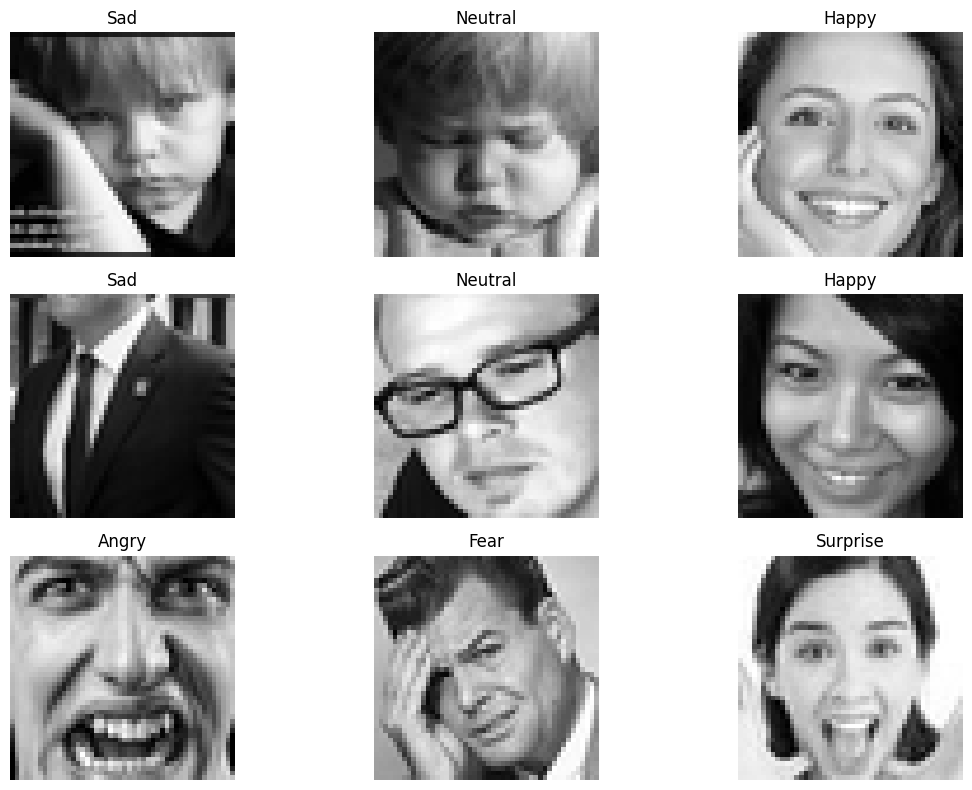

In [5]:
# Cell 8: Plot sample images
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
    plt.title(emotion_labels[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Cell 9: Import Keras components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Cell 10: Create model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Cell 11: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 512)               6

2025-04-05 06:37:37.392012: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2025-04-05 06:37:37.421160: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2025-04-05 06:37:37.423393: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.


Epoch 1/30


2025-04-05 06:37:37.639028: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 211663872 exceeds 10% of free system memory.
2025-04-05 06:37:38.051553: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.


359/359 [==============================] - 116s 320ms/step - loss: 1.6622 - accuracy: 0.3438 - val_loss: 1.5295 - val_accuracy: 0.4082
Epoch 2/30
359/359 [==============================] - 114s 318ms/step - loss: 1.4507 - accuracy: 0.4420 - val_loss: 1.3718 - val_accuracy: 0.4810
Epoch 3/30
359/359 [==============================] - 112s 313ms/step - loss: 1.3373 - accuracy: 0.4887 - val_loss: 1.3169 - val_accuracy: 0.4944
Epoch 4/30
359/359 [==============================] - 108s 301ms/step - loss: 1.2459 - accuracy: 0.5286 - val_loss: 1.2894 - val_accuracy: 0.5152
Epoch 5/30
359/359 [==============================] - 108s 302ms/step - loss: 1.1636 - accuracy: 0.5590 - val_loss: 1.2659 - val_accuracy: 0.5272
Epoch 6/30
359/359 [==============================] - 108s 301ms/step - loss: 1.0795 - accuracy: 0.5949 - val_loss: 1.2397 - val_accuracy: 0.5413
Epoch 7/30
359/359 [==============================] - 111s 308ms/step - loss: 0.9859 - accuracy: 0.6321 - val_loss: 1.2334 - val_accura

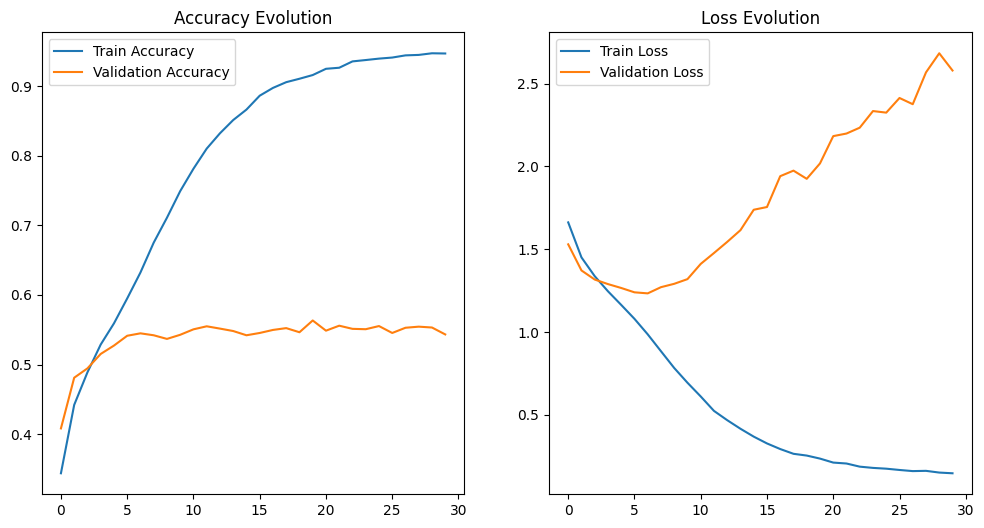

In [7]:
# Cell 12: Train model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

# Cell 13: Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
plt.show()

In [11]:
!pip install seaborn

225/225 [==============================] - 9s 40ms/step - loss: 2.6020 - accuracy: 0.5412
Test Accuracy: 54.12%
225/225 [==============================] - 9s 39ms/step


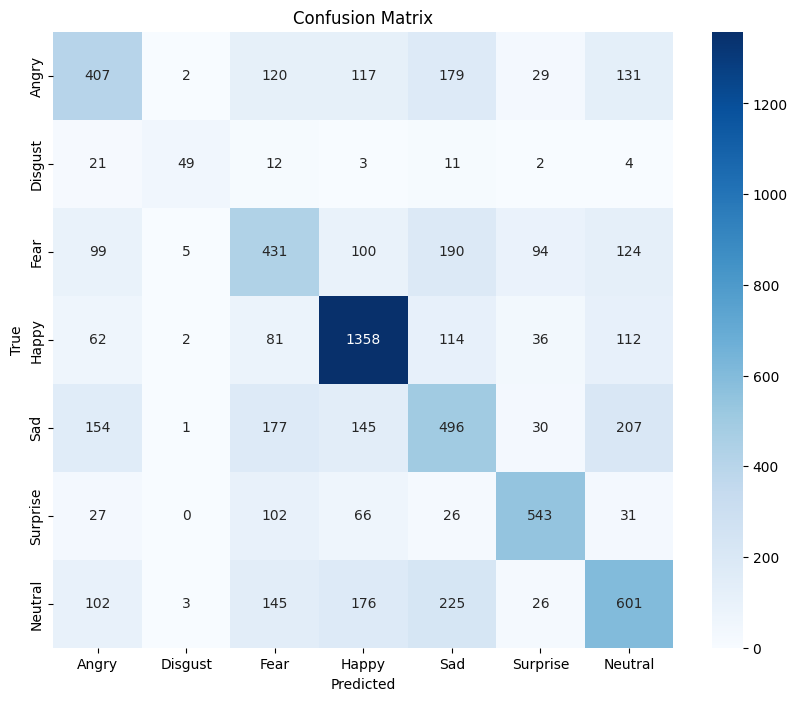

In [12]:
# Cell 14: Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Cell 15: Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels,
            yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Cell 16: Save model
model.save('fer2013_model.h5')
print("Model saved successfully!")

/usr/local/python/3.10.16/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


In [17]:
# Run in a new cell
import os
print("Model exists:", os.path.exists('fer2013_model.h5'))
print("File size:", os.path.getsize('fer2013_model.h5'), "bytes")

Model exists: True
File size: 79632320 bytes
